In [88]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [89]:
df = pd.read_csv("ckd-dataset-v2.csv")

In [90]:
df = df.iloc[2:].reset_index(drop=True)

In [107]:
print("Shape of df:", df.shape)

Shape of df: (200, 29)


In [111]:
print("\nColumn names:")
print(df.columns)


Column names:
Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')


In [112]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [93]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


In [105]:
print("\nClass distribution:")


Class distribution:


In [106]:
print(df["class"].value_counts())

class
ckd       128
notckd     72
Name: count, dtype: int64


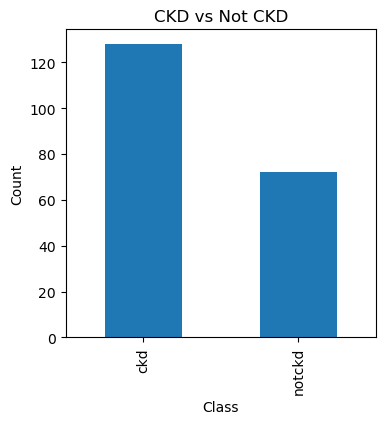

In [95]:
plt.figure(figsize=(4, 4))
df["class"].value_counts().plot(kind="bar")
plt.title("CKD vs Not CKD")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [96]:
df.sample(10, random_state=42)

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
95,1,1,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s4,1,51 - 59
15,0,0,1.019 - 1.021,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,202.778 - 227.944,s1,0,20 - 27
30,0,0,1.019 - 1.021,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,177.612 - 202.778,s1,0,27 - 35
158,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,152.446 - 177.612,s1,0,66 - 74
128,1,1,1.015 - 1.017,2 - 2,ckd,1,< 0,1,0,0,...,1,1,1,1,1,1,< 26.6175,s4,1,59 - 66
115,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,177.612 - 202.778,s1,0,59 - 66
69,1,2,1.009 - 1.011,3 - 3,ckd,1,< 0,1,0,0,...,1,1,0,1,1,1,< 26.6175,s5,1,43 - 51
170,0,0,1.009 - 1.011,3 - 3,ckd,0,< 0,1,1,1,...,1,1,1,0,0,0,< 26.6175,s4,1,66 - 74
174,1,2,1.015 - 1.017,2 - 2,ckd,0,< 0,1,1,1,...,0,0,0,0,0,0,< 26.6175,s5,1,66 - 74
45,1,1,1.019 - 1.021,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,76.949 - 102.115,s2,0,43 - 51


In [97]:
X = df.drop("class", axis=1)
y = df["class"].map({"ckd": 1, "notckd": 0})

In [98]:
print("Unique values in target y:")
print(y.unique())

Unique values in target y:
[1 0]


In [99]:
categorical_cols = X.columns.tolist()

In [100]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            Pipeline(
                steps=[
                    ("imputer", SimpleImputer(strategy="most_frequent")),
                    ("encoder", OneHotEncoder(handle_unknown="ignore"))
                ]
            ),
            categorical_cols
        )
    ]
)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [102]:
print("Train size:", X_train.shape)

Train size: (160, 28)


In [103]:
print("Test size:", X_test.shape)

Test size: (40, 28)


In [113]:
log_reg_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

In [114]:
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bp (Diastolic)', 'bp limit',
                                                   'sg', 'al', 'rbc', 'su',
                                                   'pc', 'pcc', 'ba', 'bgr',
                                                   'bu', 'sod', 'sc', 'pot',
                                                   'hemo', 'pcv', 'rbcc',
                                                   'wbcc', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane', 'grf',
                                                   'stage', 'affected',
                                                   'age'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [115]:
y_pred_lr = log_reg_model.predict(X_test)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]

In [116]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

In [118]:
print("Logistic Regression results")
print("Accuracy:", accuracy_lr)
print("F1 score:", f1_lr)
print("AUC:", auc_lr)

Logistic Regression results
Accuracy: 1.0
F1 score: 1.0
AUC: 1.0


In [119]:
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=100,
            random_state=42
        ))
    ]
)

In [120]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bp (Diastolic)', 'bp limit',
                                                   'sg', 'al', 'rbc', 'su',
                                                   'pc', 'pcc', 'ba', 'bgr',
                                                   'bu', 'sod', 'sc', 'pot',
                                                   'hemo', 'pcv', 'rbcc',
                                                   'wbcc', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane', 'grf',
                                                   'stage', 'affected',
                                                   'age'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [121]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [122]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

In [123]:
print("Random Forest results")
print("Accuracy:", accuracy_rf)
print("F1 score:", f1_rf)
print("AUC:", auc_rf)

Random Forest results
Accuracy: 1.0
F1 score: 1.0
AUC: 1.0


In [124]:
knn_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier())
    ]
)

In [125]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['bp (Diastolic)', 'bp limit',
                                                   'sg', 'al', 'rbc', 'su',
                                                   'pc', 'pcc', 'ba', 'bgr',
                                                   'bu', 'sod', 'sc', 'pot',
                                                   'hemo', 'pcv', 'rbcc',
                                                   'wbcc', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane', 'grf',
                                                   'stage', 'affected',
                                                   'age'])])),
                ('classifier', KNeighborsClassifier())])

In [126]:
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

In [127]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

In [128]:
print("KNN results")
print("Accuracy:", accuracy_knn)
print("F1 score:", f1_knn)
print("AUC:", auc_knn)

KNN results
Accuracy: 1.0
F1 score: 1.0
AUC: 1.0


In [129]:
results_df = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Random Forest",
            "K Nearest Neighbors"
        ],
        "Accuracy": [
            accuracy_lr,
            accuracy_rf,
            accuracy_knn
        ],
        "F1 score": [
            f1_lr,
            f1_rf,
            f1_knn
        ],
        "AUC": [
            auc_lr,
            auc_rf,
            auc_knn
        ]
    }
)

In [130]:
print("Model comparison:")
results_df

Model comparison:


,Model,Accuracy,F1 score,AUC
0,Logistic Regression,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0
2,K Nearest Neighbors,1.0,1.0,1.0
